# Análise Histórica dos Preços do Bitcoin 

## Introdução

Este notebook tem como objetivo analisar a progressão histórica de preços do bitcoin e verificar a existência ou não de padrões de comportamento desses preços. Além disso, também serão utilizados dados de Taxas de Juros Americanas e do indíce S&P500, para entender se existe correlação entre o movimento destes ativos.

Para este projeto, serão utilizados 3 DataFrames:
1. dataBTC: Armazena os preços históricos do Bitcoin. Os dados foram obtidos no Kaggle.
2. dataInterestRates: Contém os dados diários das Taxas de Juros Americanas, provenientes do FED (Federal Reserve).
3. dataSPIndex: Registra a cotação diária do índice S&P500, com dados coletados do site Investing.com

As ferramentas que serão utilizadas são:
1. Pandas: para a manipulação e tratamento de dados
2. seaborn:  para construção de gráficos
3. matplotlib.pyplot, para ajustes na exibição dos gráficos







## Importação de Bibliotecas 

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importação e Estrutura de Dados

Os dados foram carregados de três arquivos CSV:

1. Tabela BTC: Contém dados históricos de preços do Bitcoin, incluindo abertura, alta, baixa e fechamento.
2. Tabela Taxas de Juros (EFFR): Inclui as taxas de juros diárias fornecidas pelo Federal Reserve.
3. Tabela Index S&P500: Apresenta dados históricos do índice S&P500

In [133]:

# Leitura dos arquivos csv
dataBTC = pd.read_csv("BTC.csv")
dataInterestRates = pd.read_csv("EFFR.csv")
dataSPIndex = pd.read_csv("sp500_index.csv")

# Visualização dos topos das tabelas
print("Tabela BTC")
print(dataBTC.head())

print("\nTabela Taxas de Juros")
print(dataInterestRates.head())

print("\nTabela Index S&P500")
print(dataSPIndex.head())





Tabela BTC
  ticker        date     open     high      low    close
0    BTC  2010-07-17  0.04951  0.04951  0.04951  0.04951
1    BTC  2010-07-18  0.04951  0.08585  0.04951  0.08584
2    BTC  2010-07-19  0.08584  0.09307  0.07723  0.08080
3    BTC  2010-07-20  0.08080  0.08181  0.07426  0.07474
4    BTC  2010-07-21  0.07474  0.07921  0.06634  0.07921

Tabela Taxas de Juros
  observation_date  EFFR
0       2010-07-07  0.18
1       2010-07-08  0.17
2       2010-07-09  0.18
3       2010-07-12  0.17
4       2010-07-13  0.17

Tabela Index S&P500
         Date   S&P500
0  2014-12-19  2070.65
1  2014-12-22  2078.54
2  2014-12-23  2082.17
3  2014-12-24  2081.88
4  2014-12-26  2088.77


## Inspeção Inicial dos Dados

Esta etapa apresenta um resumo inicial de cada dataset com as funções `.info()` e `.describe()`

In [134]:
# Visualização de informações básicas da estrutura dos datasets
print("Tabela BTC")
print(dataBTC.info())

print("\nTabela Taxas de Juros")
print(dataInterestRates.info())

print("\nTabela Index S&P500")
print(dataSPIndex.info())

Tabela BTC
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5260 entries, 0 to 5259
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  5260 non-null   object 
 1   date    5260 non-null   object 
 2   open    5260 non-null   float64
 3   high    5260 non-null   float64
 4   low     5260 non-null   float64
 5   close   5260 non-null   float64
dtypes: float64(4), object(2)
memory usage: 246.7+ KB
None

Tabela Taxas de Juros
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3764 entries, 0 to 3763
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  3764 non-null   object 
 1   EFFR              3625 non-null   float64
dtypes: float64(1), object(1)
memory usage: 58.9+ KB
None

Tabela Index S&P500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 2 columns):
 #   Column  Non-Null Coun

In [ ]:
# Visualizando informações estatisticas das tabelas
print("Tabela BTC")
print(dataBTC.describe())

print("\nTabela Taxas de Juros")
print(dataInterestRates.describe())

print("\nTabela Index S&P500")
print(dataSPIndex.describe())

Tabela BTC
                open           high          low          close
count    5260.000000    5260.000000   5260.00000    5260.000000
mean    13604.027645   13930.038948  13262.89526   13622.865358
std     19909.221298   20364.978868  19442.16766   19941.962706
min         0.049510       0.049510      0.01000       0.049510
25%       235.807500     239.910000    231.67250     235.827500
50%      3648.225000    3740.905000   3589.17000    3649.575000
75%     20347.800000   20873.750000  19871.27500   20355.075000
max    100648.000000  104062.000000  99087.60000  100648.000000

Tabela Taxas de Juros
              EFFR
count  3625.000000
mean      1.250748
std       1.722735
min       0.040000
25%       0.090000
50%       0.190000
75%       1.910000
max       5.330000

Tabela Index S&P500
            S&P500
count  2516.000000
mean   3343.815465
std    1076.310807
min    1829.080000
25%    2426.960000
50%    2997.955000
75%    4197.300000
max    6090.270000


## Conversão de Tipos de Dados

Neste etapa, as colunas de datas, das tabela 'dataInterestRates' e 'dataBTC', foram convertidas para o formato 'datetime'. 

Além disso, foram criadas as colunas 'year" e 'month', na tabela 'dataBTC'.

In [136]:
# Convertendo datas das tabelas 'dataInterestRates', 'dataBTC' e 'dataSPIndex' para o tipo pandas datetime
dataInterestRates["observation_date"] = pd.to_datetime(dataInterestRates["observation_date"])
dataBTC["date"] = pd.to_datetime(dataBTC["date"])
dataSPIndex["Date"] = pd.to_datetime(dataSPIndex["Date"])

# Criando colunas 'year' e 'month' na tabela dataBTC
dataBTC["year"] = pd.to_datetime(dataBTC["date"]).dt.year
dataBTC["month"] = pd.to_datetime(dataBTC["date"]).dt.month


print(dataBTC.info())
print(dataInterestRates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5260 entries, 0 to 5259
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ticker  5260 non-null   object        
 1   date    5260 non-null   datetime64[ns]
 2   open    5260 non-null   float64       
 3   high    5260 non-null   float64       
 4   low     5260 non-null   float64       
 5   close   5260 non-null   float64       
 6   year    5260 non-null   int32         
 7   month   5260 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(2), object(1)
memory usage: 287.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3764 entries, 0 to 3763
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  3764 non-null   datetime64[ns]
 1   EFFR              3625 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory

## Entendendo o histórico de preços do bitcoin

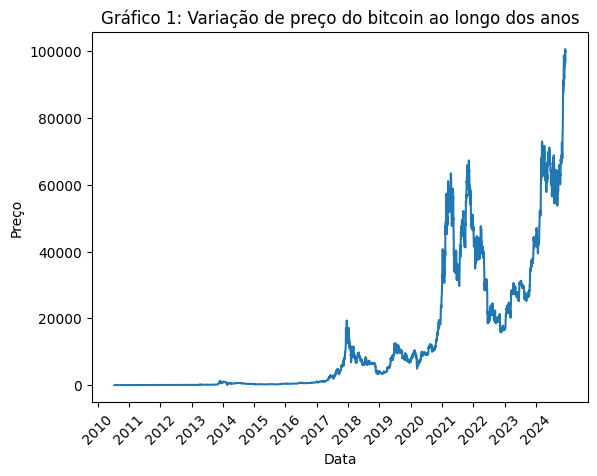

In [137]:
# Criando Array com os anos presentes no dataset 'dataBTC'
yearsArray = dataBTC["year"].unique()

# Criando gráfico de linhas do preço histórico do bitcoin
sns.lineplot(data = dataBTC, x = "date", y = "close")
plt.title("Gráfico 1: Variação de preço do bitcoin ao longo dos anos")
plt.ylabel("Preço")
plt.xlabel("Data")
plt.xticks(ticks = pd.to_datetime(yearsArray, format='%Y'),
            labels = yearsArray, 
            rotation = 45)
plt.show()



Através deste gráfico, pode-se observar que o preço do Bitcoin, entre 2010 e 2024, trilhou um caminho de grande volatilidade, apresentando momentos de picos e correções intensos. 

É interessante notar que, após cada correção significativa, os preços se mantêm consistentemente acima dos níveis de base anteriores aos picos. Esse comportamento sugere uma tendência de valorização contínua do Bitcoin ao longo dos anos, mesmo em meio às flutuações do mercado.


## Variações Mensais e Halvings do Bitcoin

Foram calculadas as variações mensais e analisados os efeitos dos eventos de halving no preço do Bitcoin

In [138]:
# Determinando preço de abertura e fechamento de cada mês em 'dataBTC'
aberturaPorMes = dataBTC.groupby(["year", "month"])['open'].agg('first')
fechamentoPorMes = dataBTC.groupby(["year", "month"])['close'].agg('last')

# Unindo abertura e fechamento em uma tabela só
tabelaMensalizada = pd.merge(aberturaPorMes, fechamentoPorMes, how = "inner", on = ['year', 'month']).reset_index()

# Calculando a variação mensal
tabelaMensalizada["variacao"] = round((tabelaMensalizada["close"] - tabelaMensalizada["open"]) / tabelaMensalizada["open"] * 100, 2)

tabelaMensalizada.head()



,year,month,open,close,variacao
0,2010,7,0.04951,0.06785,37.04
1,2010,8,0.06785,0.06000,-11.57
2,2010,9,0.06000,0.06190,3.17
3,2010,10,0.06190,0.19250,210.99
4,2010,11,0.19250,0.20820,8.16


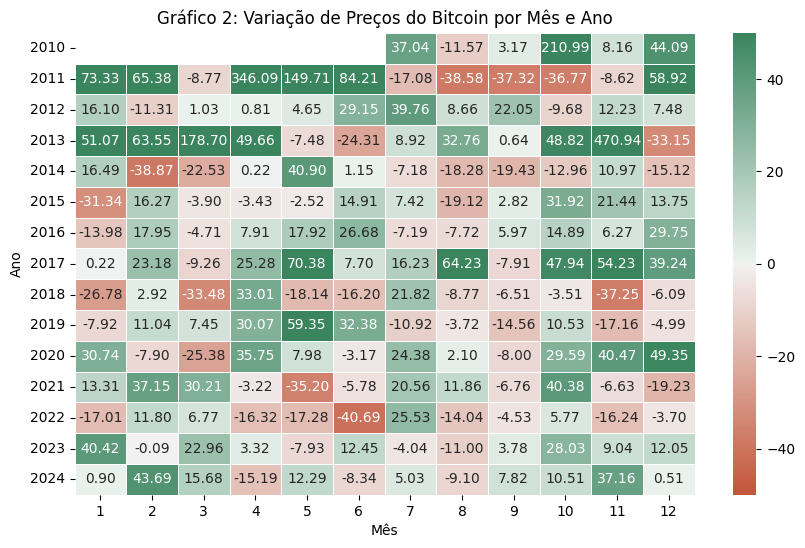

In [139]:
# Formatando dados para o heatmap
dadosHeatmap = pd.pivot_table(tabelaMensalizada, index = 'year', columns = 'month', values = 'variacao')
dadosHeatmap.head()

# Criando esquema de cores
cmap = sns.diverging_palette(20, 145, as_cmap=True)

# Criando heatmap de variação mensal
plt.figure(figsize=(10, 6))
sns.heatmap(dadosHeatmap, annot=True, fmt=".2f", cmap=cmap, cbar=True, linewidths=0.5, center=0, vmin = -50, vmax = 50 )
plt.title('Gráfico 2: Variação de Preços do Bitcoin por Mês e Ano')
plt.ylabel('Ano')
plt.xlabel('Mês')
plt.show()

O heatmap da variação mensal dos preços do Bitcoin ilustra como é, muitas vezes, imprevisível a variação futura do ativo. Através do gráfico, pode-se constatar que, ao longo dos anos, todos os meses apresentaram as mais diversas variações de preços, indicando que a variação de preços mensal não é consistente de ano para ano.

No entanto, isso não significa que certas tendências não possam ser inferidas. Por exemplo, o mês de Outubro, nos últimos 10 anos, apresentou variações positivas em 9 ocasiões. A única variação negativa ocorreu em 2018, ano que marcava a segunda metade do ciclo do Halving de 2016 e já indicava uma forte correção no mercado. Inclusive, por conta desse histórico, outubro é conhecido como "Uptober" dentro da comunidade de criptomoedas

Esses padrões sazonais, ainda que não sejam garantias, podem oferecer insights valiosos para investidores e analistas que buscam entender o comportamento histórico do Bitcoin.

Text(0, 0.5, 'Variação Percentual')

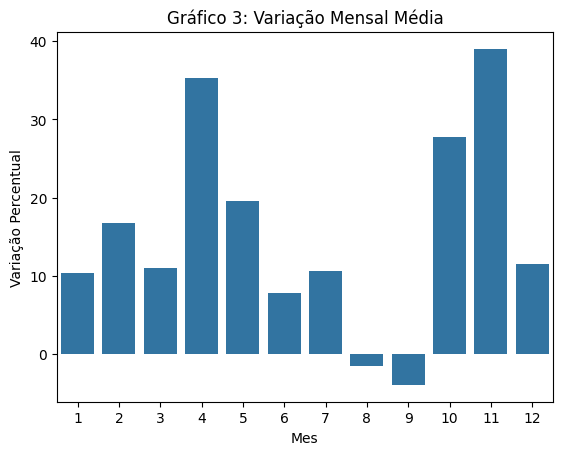

In [140]:
# Calculando a média de variação mensal
variacaoMensalMedia = tabelaMensalizada.groupby("month")["variacao"].agg("mean").reset_index()

# Construindo gráfico de barras
variacaoMensalMedia.head()
sns.barplot(variacaoMensalMedia, x = "month", y = "variacao")
plt.title("Gráfico 3: Variação Mensal Média")
plt.xlabel("Mes")
plt.ylabel("Variação Percentual")


Após analisar o heatmap da variação mensal, a análise da variação mensal média do preços do bitcoin pode ser feita de maneira mais embasada. Pode-se notar que, os meses agosto e setembro, historicamente, são meses de correção de preços, o que é explicitado no gráfico acima. Além disso, também nota-se que, geralmente, os meses posteriores, outubro e novembro, apresentam ganhos substanciais.

Também é um muito importante lembrar que este gráfico apresenta uma média e que, ao longos dos anos, o movimento dos preços não é constante. No geral, este gráfico é de extrema valia para ilustrar como, em média, o preço do bitcoin sobe ao longo do tempo.

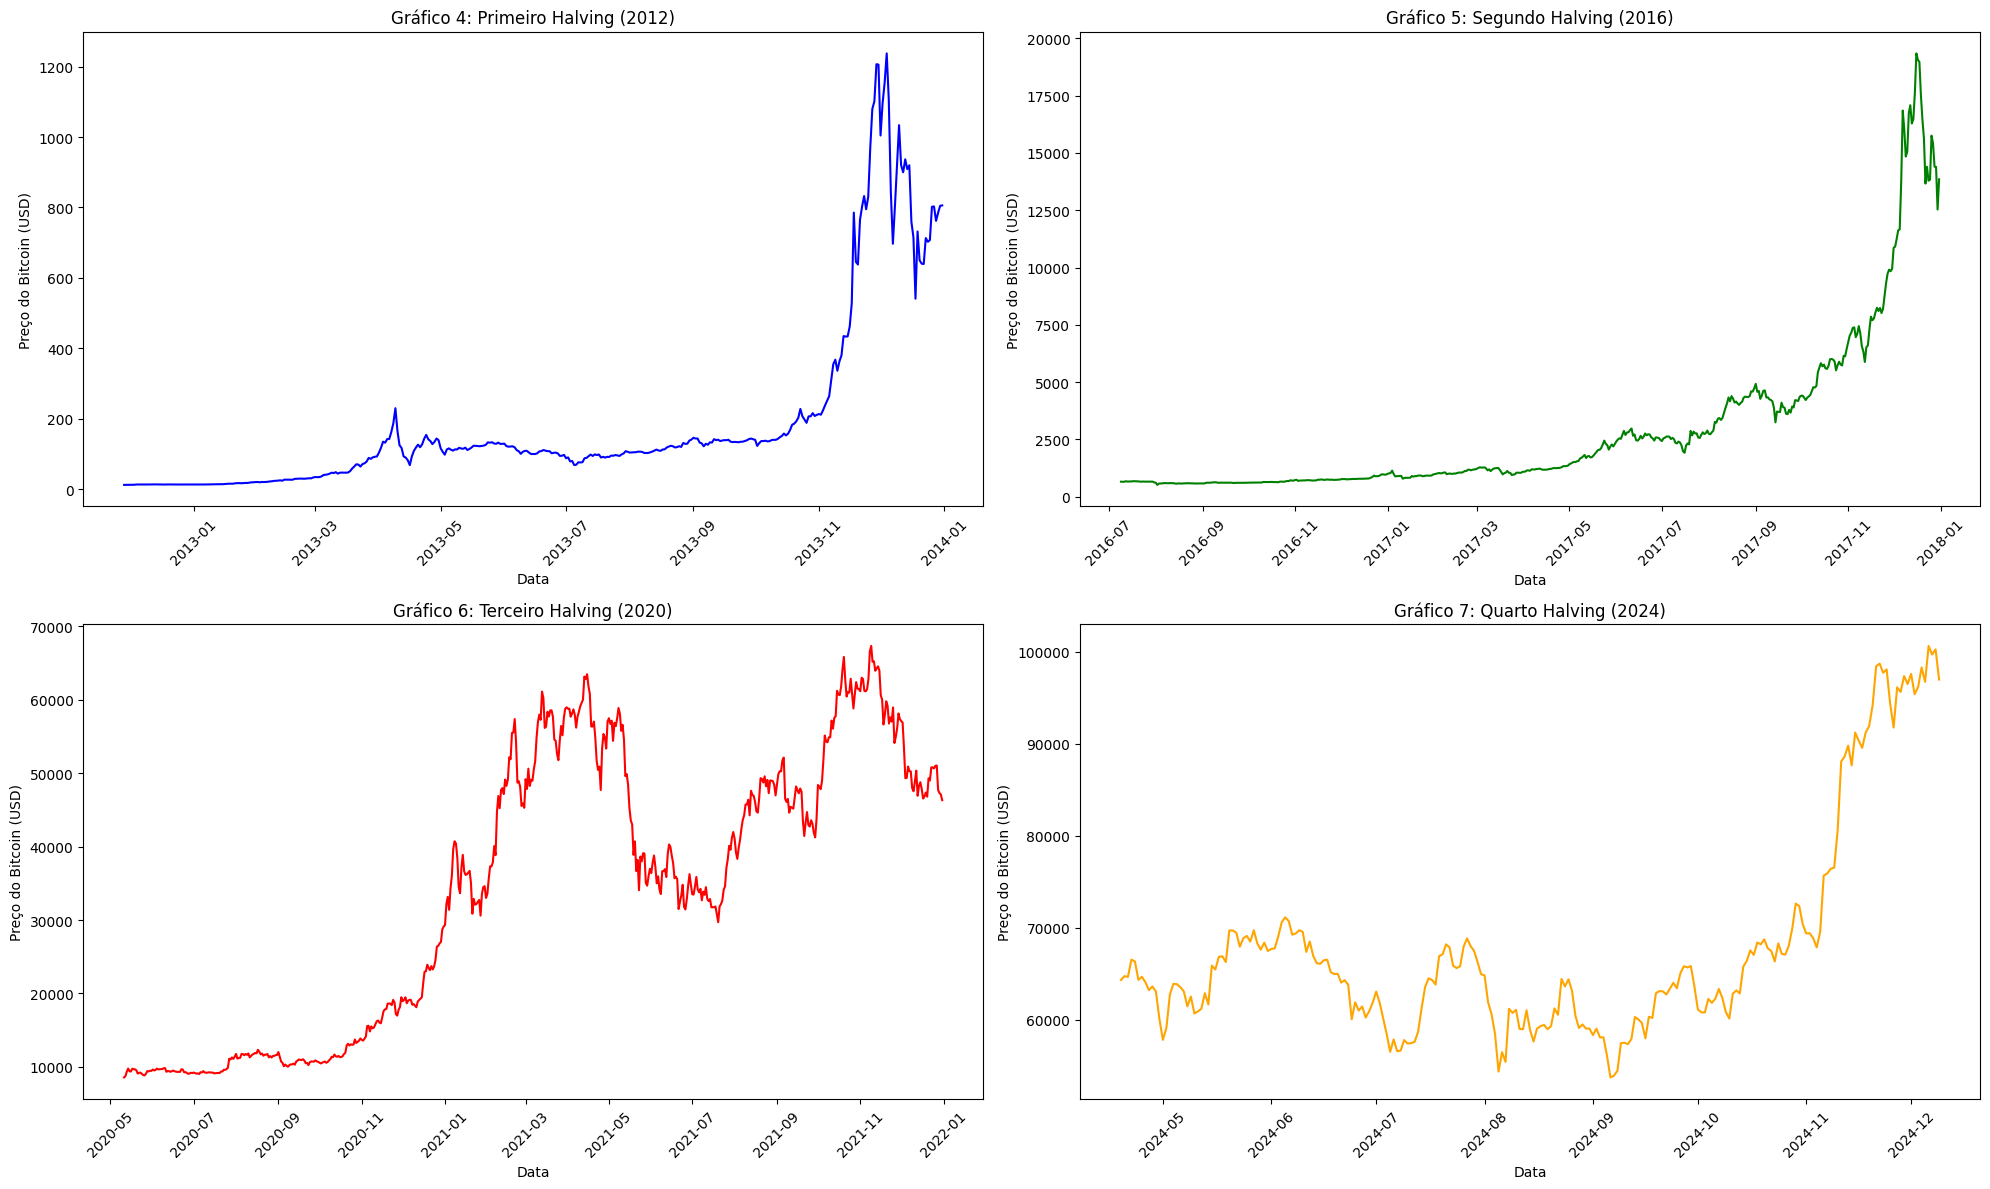

In [141]:
# Buscando informações históricas de períodos pós-halving. 
# Foram buscados os valores entre a data do Halving e o fim do ano posterior à ele.
primeiroHalving = dataBTC.query("date >= '2012-11-28' and date <= '2013-12-31'")

segundoHalving = dataBTC.query("date >= '2016-07-09' and date <= '2017-12-31'")

terceiroHalving = dataBTC.query("date >= '2020-05-11' and date <= '2021-12-31'")

quartoHalving = dataBTC.query("date >= '2024-04-19' and date <= '2024-12-09'")


fig, axs = plt.subplots(2, 2, figsize=(20, 12)) 

# Criando gráfico de linhas do primeiro Halving
axs[0, 0].plot(primeiroHalving['date'], primeiroHalving['close'], color='blue')
axs[0, 0].set_title('Gráfico 4: Primeiro Halving (2012)')
axs[0, 0].set_xlabel('Data')
axs[0, 0].set_ylabel('Preço do Bitcoin (USD)')
axs[0, 0].tick_params(axis='x', rotation=45)  

# Criando gráfico de linhas do segundo Halving
axs[0, 1].plot(segundoHalving['date'], segundoHalving['close'], color='green')
axs[0, 1].set_title('Gráfico 5: Segundo Halving (2016)')
axs[0, 1].set_xlabel('Data')
axs[0, 1].set_ylabel('Preço do Bitcoin (USD)')
axs[0, 1].tick_params(axis='x', rotation=45)

# Criando gráfico de linhas do terceiro Halving
axs[1, 0].plot(terceiroHalving['date'], terceiroHalving['close'], color='red')
axs[1, 0].set_title('Gráfico 6: Terceiro Halving (2020)')
axs[1, 0].set_xlabel('Data')
axs[1, 0].set_ylabel('Preço do Bitcoin (USD)')
axs[1, 0].tick_params(axis='x', rotation=45)

# Criando gráfico de linhas do quarto Halving
axs[1, 1].plot(quartoHalving['date'], quartoHalving['close'], color='orange')
axs[1, 1].set_title('Gráfico 7: Quarto Halving (2024)')
axs[1, 1].set_xlabel('Data')
axs[1, 1].set_ylabel('Preço do Bitcoin (USD)')
axs[1, 1].tick_params(axis='x', rotation=45)


plt.tight_layout()


plt.show()



Os quatro gráficos acima ilustram perfeitamente uma tendência bem conhecida no mundo do Bitcoin: a subida vertiginosa dos preços após o Halving. Este fenômeno, que ocorre a cada quatro anos, representa o corte pela metade da recompensa em bitcoins dada aos mineradores por bloco minerado. Isso reduz a taxa de stock-to-flow do Bitcoin, gerando um choque de oferta e, consequentemente, elevando os preços.

Além disso, o Halving é um evento amplamente noticiado, o que aumenta a visibilidade do Bitcoin e atrai mais investidores para a moeda, pressionando a demanda e, historicamente, impulsionando os preços de forma significativa.

No que diz respeito ao gráfico referente ao Halving de 2024, é importante notar que os preços podem ainda não ter atingido seu pico. Ao longo de 2025, o crescimento pode continuar, levando a uma alta ainda maior.

## Relação entre Bitcoin e Taxas de Juros

Os dados do Bitcoin foram cruzados com as taxas de juros (EFFR) para investigar relações entre esses indicadores

In [142]:
# Mesclando datasets 'dataBTC' e 'dataInterestRates'
bitcoinAndRates = pd.merge(dataBTC, dataInterestRates, how = 'inner', left_on = "date", right_on = "observation_date")

# Mantendo apenas as colunas que serão utilizadas
bitcoinAndRates = bitcoinAndRates[["date", "close", "EFFR"]]

bitcoinAndRates.head()

,date,close,EFFR
0,2010-07-19,0.08080,0.19
1,2010-07-20,0.07474,0.18
2,2010-07-21,0.07921,0.18
3,2010-07-22,0.05050,0.18
4,2010-07-23,0.06262,0.19


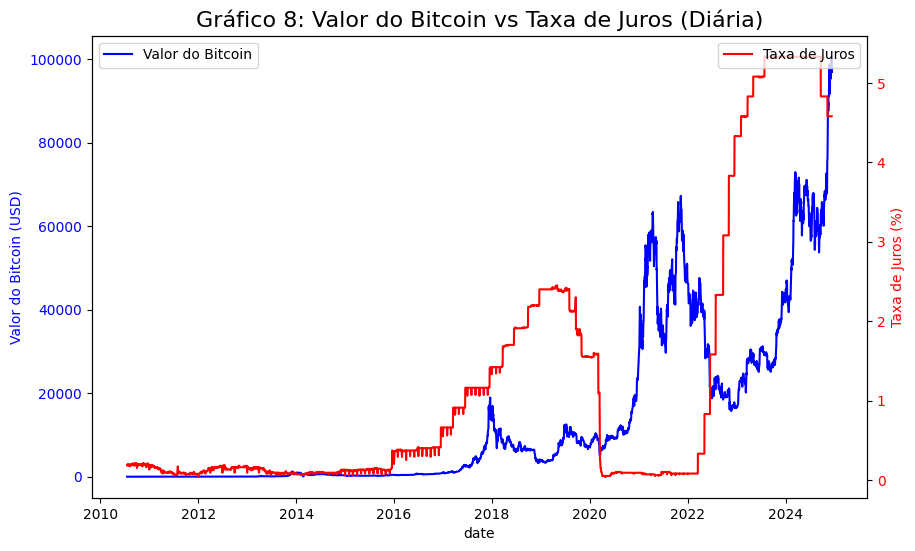

In [143]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Criando gráfico de linhas com os dados históricos do bitcoin
sns.lineplot(data=bitcoinAndRates, x='date', y='close', ax=ax1, label='Valor do Bitcoin', color='blue')
ax1.set_ylabel('Valor do Bitcoin (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Adicionando dados das taxas de juros
ax2 = ax1.twinx()
sns.lineplot(data=bitcoinAndRates, x='date', y='EFFR', ax=ax2, label='Taxa de Juros', color='red')
ax2.set_ylabel('Taxa de Juros (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Ajustando informações do gráfico
ax1.set_title('Gráfico 8: Valor do Bitcoin vs Taxa de Juros (Diária)', fontsize=16)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

Ao observarmos os movimentos de preço do Bitcoin ao lado das taxas de juros básicas americanas, podemos notar que, em diversos momentos, eles apresentam uma relação inversa: quando as taxas sobem, o Bitcoin cai; quando as taxas caem, o Bitcoin sobe. Dois exemplos claros dessa relação são a queda nas taxas de juros no início de 2020, que levou a uma alta vertiginosa do preço do Bitcoin nos meses seguintes, e o início de 2022, quando a sinalização de aumento nas taxas de juros causou uma correção ainda mais acentuada nos preços do Bitcoin, que já enfrentava um ciclo de baixa.

Essa relação é explicada pela interação entre taxas de juros e o apetite por risco nos mercados. A redução nas taxas de juros representa "dinheiro mais barato", o que incentiva investimentos mais arriscados, como o Bitcoin. Já com taxas mais altas, o apetite por risco diminui e, consequentemente, a demanda por ativos de risco, como o Bitcoin, tende a cair, o que pressiona os preços para baixo.

É importante ressaltar, no entanto, que as taxas de juros não são o único fator que impacta o preço do Bitcoin. Em momentos como os mencionados, outros eventos, como a pandemia de COVID-19, o Halving e a falência da FTX, também desempenharam papéis cruciais na formação dos preços.

## Relação entre Bitcoin e S&P500
Os dados do Bitcoin foram cruzados com o índice S&P500 para analisar correlações e variações entre os dois indicadores


In [144]:
# Mesclando 'dataBTC' e 'dataSPIndex' para formar 'bitcoinAndSP500'
bitcoinAndSP500 = pd.merge(dataBTC, dataSPIndex, how = 'inner', left_on = "date", right_on = "Date")

# Selecionando apenas as colunas necessárias
bitcoinAndSP500 = bitcoinAndSP500[["date", "close", "S&P500"]]

# Renomeando coluna 'close' para 'Bitcoin' para facilitar o entendimento
bitcoinAndSP500.rename(columns={"close" : "Bitcoin"}, inplace=True)
bitcoinAndSP500.head()

,date,Bitcoin,S&P500
0,2014-12-19,317.78,2070.65
1,2014-12-22,330.84,2078.54
2,2014-12-23,335.25,2082.17
3,2014-12-24,322.40,2081.88
4,2014-12-26,329.98,2088.77


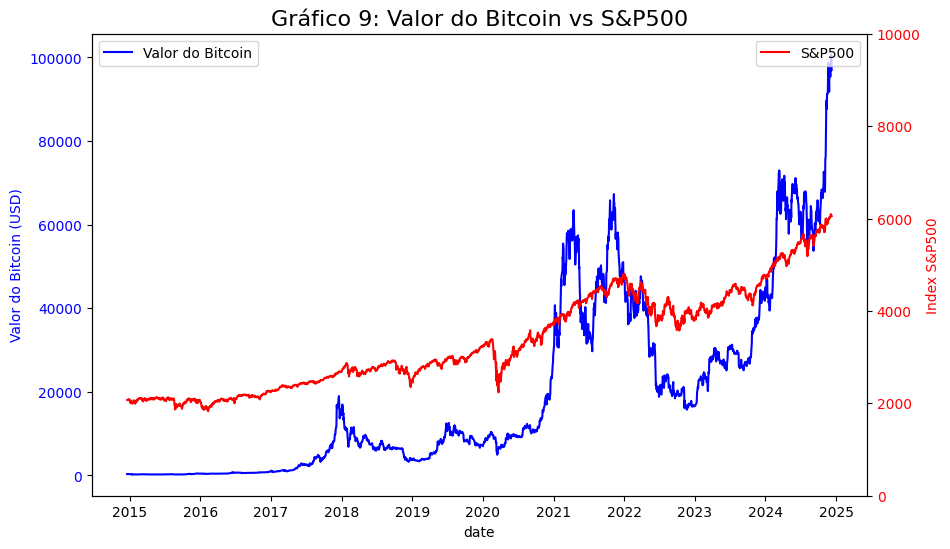

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Criando gráfico de linhas com os valores históricos do bitcoin
sns.lineplot(data=bitcoinAndSP500, x='date', y='Bitcoin', ax=ax1, label='Valor do Bitcoin', color='blue')
ax1.set_ylabel('Valor do Bitcoin (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Adicionando linhas com os valores históricos do S&P500
ax2 = ax1.twinx()
sns.lineplot(data=bitcoinAndSP500, x='date', y='S&P500', ax=ax2, label='S&P500', color='red')
ax2.set_ylabel('Index S&P500', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.ylim(0, 10000)

# Ajustando detalhes do gráfico 9
ax1.set_title('Gráfico 9: Valor do Bitcoin vs S&P500', fontsize=16)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

Antes de analisar o gráfico acima, é importante observar as escalas utilizadas para cada ativo. À esquerda, em azul, está o range de preços do Bitcoin, que é muito maior do que o range do S&P 500, representado à direita, em vermelho. Isso ocorre pela maior escala de variação de preços do bitcoin ao longo dos anos.

O S&P 500 é um índice amplamente utilizado para avaliar o desempenho do mercado americano. Comparar seus movimentos com os do Bitcoin é extremamente relevante para entender como esses dois grandes ativos se relacionam.

No gráfico, podemos observar que ambos apresentam movimentos muito semelhantes e, historicamente, são afetados de maneira parecida por eventos políticos e macroeconômicos. Isso ocorre, principalmente, porque ambos são considerados ativos de maior risco, e alterações na percepção de risco no mercado tendem a impactar os preços de forma similar.

Um exemplo claro é a queda brusca no início de 2020, causada pela pandemia de COVID-19 e pela aversão ao risco gerada pelas incertezas no cenário político e econômico global. Logo depois, ambos demonstraram uma recuperação significativa, seguida de uma alta expressiva nos preços, impulsionada pela queda nas taxas de juros (explicada no gráfico anterior), que reduziu drasticamente a aversão ao risco.

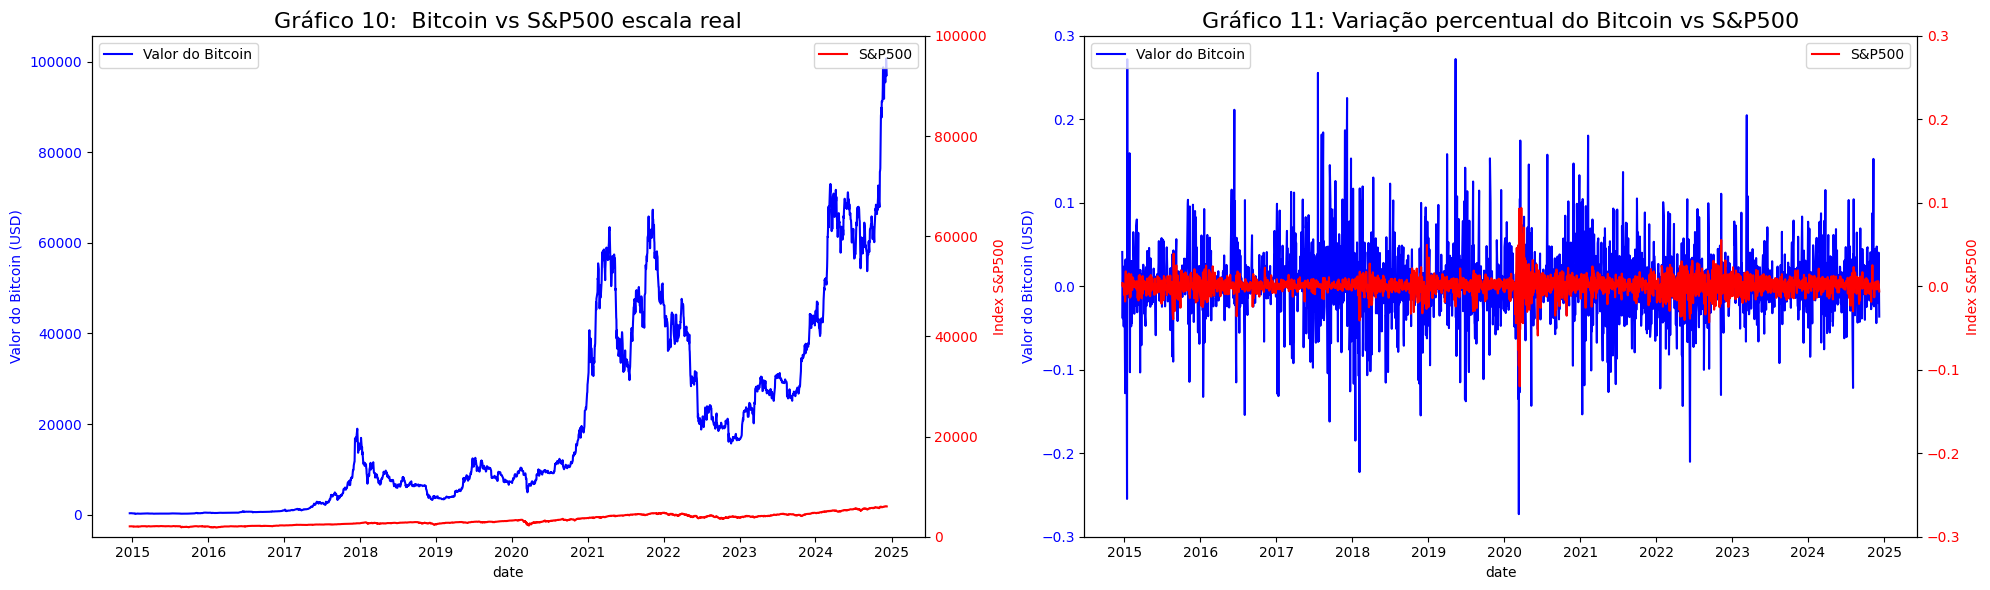

In [146]:
# Criando colunas de variação percentual na tabela 'bitcoinAndSP500'
bitcoinAndSP500["variacaoPercentualBitcoin"] = bitcoinAndSP500["Bitcoin"].pct_change()
bitcoinAndSP500["variacaoPercentualS&P500"] = bitcoinAndSP500["S&P500"].pct_change()

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(20, 6))

ax1.set_title('Gráfico 10:  Bitcoin vs S&P500 escala real', fontsize=16)

# Criando gráfico de linhas para os preços do bitcoin
sns.lineplot(data=bitcoinAndSP500, x='date', y='Bitcoin', ax=ax1, label='Valor do Bitcoin', color='blue')
ax1.set_ylabel('Valor do Bitcoin (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criando gráfico de linhas para os preços do S&P500
ax2 = ax1.twinx()
sns.lineplot(data=bitcoinAndSP500, x='date', y='S&P500', ax=ax2, label='S&P500', color='red')
ax2.set_ylabel('Index S&P500', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.ylim(0, 100000)

# Criando gráfico de linhas para a variação percentual do bitcoin
sns.lineplot(data=bitcoinAndSP500, x='date', y='variacaoPercentualBitcoin', ax=ax3, label='Valor do Bitcoin', color='blue')
ax3.set_ylabel('Valor do Bitcoin (USD)', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.set_ylim(-0.3, 0.3)

# Criando gráfico de linhas para a variação percentual do S&P500
ax4 = ax3.twinx()
sns.lineplot(data=bitcoinAndSP500, x='date', y='variacaoPercentualS&P500', ax=ax4, label='S&P500', color='red')
ax4.set_ylabel('Index S&P500', color='red')
ax4.tick_params(axis='y', labelcolor='red')
ax4.set_ylim(-0.3, 0.3)

# Ajustando detalhes do grafico 11
ax3.set_title('Gráfico 11: Variação percentual do Bitcoin vs S&P500', fontsize=16)
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')

# Ajustando o layout
plt.tight_layout()
plt.show()

Complementando a análise do gráfico de variação nominal dos preços do Bitcoin e do S&P 500, estes gráficos ilustram claramente a maior volatilidade e escala dos preços do Bitcoin em comparação ao S&P 500.
O gráfico 10 é uma versão do gráfico 9 com escala ajustada, com objetivo de mostrar a real diferença entre os preços e volatilidades dos dois ativos.
Já o gráfico 11 traz uma comparação entre as variações percentuais entre os dois ativos.

A partir das análise destes dois gráficos, ficam explicitos a enorme diferença entre a escala dos preços dos ativos e, principalmente, a grande difereça entre suas volatilidades.

Essa volatilidade é um forte indicativo dos maiores riscos associados ao Bitcoin, já que suas quedas são muito mais acentuadas. Ao mesmo tempo, ela também destaca o maior potencial de ganho, pois as altas do Bitcoin são significativamente mais vertiginosas.

Nos últimos anos, com o mercado em movimento de grande valorização dos ativos de risco, o Bitcoin apresentou retornos maiores devido à sua alta volatilidade. No entanto, fica evidente que, em um cenário de maior aversão ao risco, a tendência seria de perdas ainda mais expressivas para o Bitcoin em comparação ao S&P 500.

## Conclusão

O crescimento exponencial do Bitcoin só foi possível devido à maior compreensão e credibilidade que a população passou a atribuir ao ativo e aos seus princípios. Sem esse respaldo, dificilmente o Bitcoin teria alcançado tais níveis e, possivelmente, já teria colapsado. No entanto, esse não foi o único fator determinante. O preço do Bitcoin também foi fortemente influenciado pelo cenário macroeconômico global.

Em uma era marcada por baixas taxas de juros, decorrentes da crise econômica de 2008 (que, inclusive, serviu de inspiração para a criação do Bitcoin), o apetite por risco dos investidores aumentou significativamente. Isso beneficiou não apenas o Bitcoin, mas também o mercado de valores mobiliários, representado nesta análise pelo índice S&P 500.

Assim, é possível especular que, em um cenário global de maior restrição de crédito, o preço do Bitcoin poderá sofrer impactos significativos, enfrentando uma forte correção que deve ocorrer em paralelo à correção nas bolsas de valores. Contudo, assim como as bolsas de valores não desaparecerão, é improvável que o Bitcoin desapareça. Seus princípios são extremamente sólidos e, mesmo em períodos de baixa, a tendência é que seu valor continue sendo reconhecido pelos investidores.

É importante ressaltar que este cenário futuro está longe de ser definitivo. Para muitos, o Bitcoin pode, nos próximos anos, ser adotado como uma reserva de valor global, mudando sua classificação de ativo de risco para ativo de segurança. Com isso, a relação entre o Bitcoin e as bolsas de valores poderia se inverter, e a criptomoeda passaria a ser comparada de forma mais adequada ao ouro.

Nos últimos meses, esse cenário tem se tornado cada vez mais plausível. Com a crescente adoção institucional e governamental do Bitcoin, a percepção sobre a criptomoeda pode mudar rapidamente. Além disso, o aumento do market cap do Bitcoin, que contribui para a diminuição de sua volatilidade, reforça a possibilidade de que o ativo seja tratado como uma reserva de valor no futuro. Dessa forma, o Bitcoin pode se consolidar como um ativo de segurança, rompendo com as características que hoje o associam a investimentos de alto risco.

